**LIBRARY YANG DIBUTUHKAN**

In [11]:
!pip install kagglehub
!pip install langchain_community
!pip install replicate

**Dataset dari Kaggle via kagglehub**

In [12]:
import kagglehub

# Download dataset "Customer Personality Analysis"
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

print("Dataset berhasil diunduh di:", path)


Dataset berhasil diunduh di: /kaggle/input/customer-personality-analysis


**Muat Dataset CSV ke dalam DataFrame**

In [13]:
import pandas as pd

df = pd.read_csv(path + "/marketing_campaign.csv", sep='\t')

# Lihat 5 data teratas
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Analisis Awal: Cek Struktur Data**


In [14]:
# Info ringkas dataset
df.info()

# Statistik umum
df.describe()

# Cek data kosong
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Visualisasi Awal**

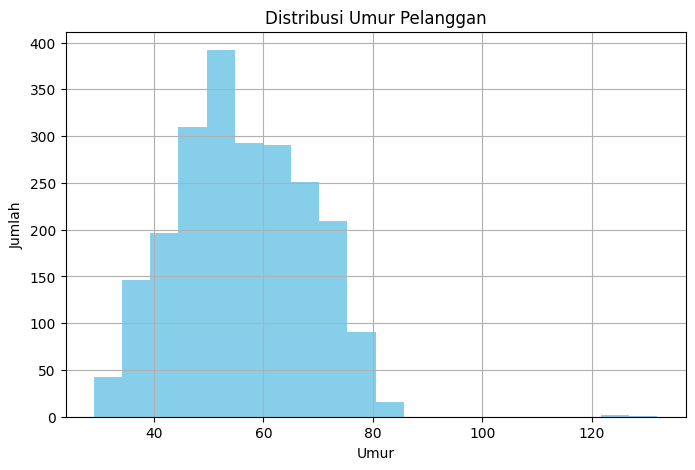

In [15]:
import matplotlib.pyplot as plt

# Visualisasi distribusi usia pelanggan
plt.figure(figsize=(8, 5))
df['Age'] = 2025 - df['Year_Birth']
df['Age'].hist(bins=20, color='skyblue')
plt.title("Distribusi Umur Pelanggan")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.grid(True)
plt.savefig("usia_pelanggan.png")
plt.show()


**Setup Model IBM Granite untuk Analisis AI**

In [16]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Inisialisasi model IBM Granite
model = "ibm-granite/granite-3.3-8b-instruct"
llm = Replicate(model=model, replicate_api_token=api_token)


Kirim Prompt ke AI untuk Analisis Otomatis

In [17]:
summary = df.describe(include='all').to_string()

prompt = f"""
Saya memiliki dataset pelanggan dari perusahaan pemasaran. Berikut adalah ringkasan statistik data pelanggan:

{summary}

Mohon bantu analisis data ini dengan menjawab:
1. Apa pola dan insight yang muncul dari data?
2. Temuan penting yang bisa diambil?
3. Rekomendasi apa yang bisa diberikan berdasarkan data?

Gunakan bahasa yang mudah dimengerti oleh pebisnis.
"""

response = llm.invoke(prompt)
print(response)


1. **Pola dan Insight dari Data:**

   - **Umur Pelanggan:** Rata-rata umur pelanggan adalah sekitar 55 tahun, dengan minimum 0 tahun dan maksimum 11191 tahun. Ini mungkin berarti bahwa dataset mungkin mengandung pelanggan yang sangat berbeda umurnya, yang mungkin disebabkan oleh kesalahan input atau kategori umur yang tidak sesuai. Umumnya, umur pelanggan dalam dataset harus terkonsentrasi pada rentang umur yang relevan dengan produk yang dijual.
   
   - **Pendapatan Pelanggan:** Rata-rata pendapatan pelanggan adalah sekitar 52,247 (dalam mata uang standar yang tidak ditentukan). Ini menunjukkan bahwa pelanggan umumnya memiliki kemampuan belanja yang tinggi, yang memungkinkan mereka untuk membeli produk dari kategori yang lebih mahal seperti dinyatakan dalam kolom 'Mnt...Products'.
   
   - **Status Hubungan:** Kebanyakan pelanggan terdaftar adalah yang kawin (864 pelanggan), dan sekitar 13% terlalu muda (dikategorikan sebagai 'Single' atau tidak terdefinisi). Ini bisa memberikan ins